In [47]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential,NFWPotential, compute_coeffs_spherical,compute_coeffs_axi
from galpy.potential import LogarithmicHaloPotential,FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


#SCFPotential

## Examples

### Spherical density 

Consider $\rho (r) = \frac{1}{2\pi} \frac{1}{r (1 + r)^3}$

We get $A_{nlm} = \delta_{n0}\delta_{l0}\delta_{m0}$

In [48]:
def rho_Spherical(R, z=0, phi=0., a=1.):
    r, theta, phi = cyl_to_spher(R,z, phi)
    return (2*nu.pi)**-1 * nu.power((r/a)*(a + r)**3 ,-1)

In [49]:
Acos, Asin = compute_coeffs_spherical(rho_Spherical,2, 1.)

Creating the SCFPotential object

In [50]:
scf = SCFPotential(1., Acos, Asin, 1.)

In [51]:
def calculateSCFDensity(scf, R, Z=0., phi=0.):
    density = nu.zeros(len(R), float)
    if type(Z) == float: Z = nu.ones((len(R)), float)*Z
    for i in range(len(R)):
        density[i] = scf.dens(R[i],Z[i])
    return density

In [52]:
R = nu.linspace(0.001, .1, 1000)
density = calculateSCFDensity(scf, R)
densityAnalytic = rho_Spherical(R, a=1.)

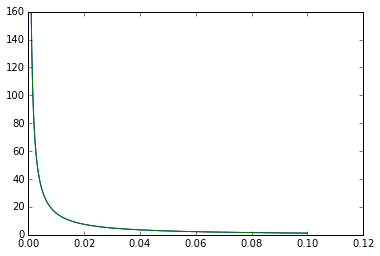

In [53]:
plt.plot(R, density)
plt.plot(R, densityAnalytic)

We confirm that our numerical density matches with our analytic density

#### Comparing to Hernquist potential

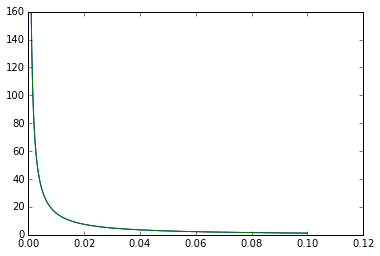

In [54]:
h = HernquistPotential(2., 1.) ## Equation (2.1) and the implemented Hernquist amplitude has a factor 2 difference
z = nu.zeros(len(R))
hDensity = h.dens(R,z)
plt.plot(R, density)
plt.plot(R, hDensity)

Confirmed that the implemented SCF potential matches with the already implemented Hernquist potential.

The only note is amp=2. 

### Zeeuw's perfect ellipsoid

Consider $\rho (r) = \frac{3}{4\pi} \frac{1}{(1 + r)^4}$

We get $A_{nlm} = \frac{3}{4}\delta_{n0}\delta_{l0}\delta_{m0} + \frac{1}{12}\delta_{n1}\delta_{l0}\delta_{m0}$

In [55]:
def rho_Zeeuw(R, z=0., phi=0., a=1.):
    r, theta, phi = cyl_to_spher(R,z, phi)
    return 3./(4*nu.pi) * nu.power((a + r),-4.) * a

In [56]:
Acos, Asin = compute_coeffs_spherical(rho_Zeeuw, 2) 
scf = SCFPotential(1., Acos, Asin, 1)

In [57]:
density = calculateSCFDensity(scf, R)
densityAnalytic = rho_Zeeuw(R)


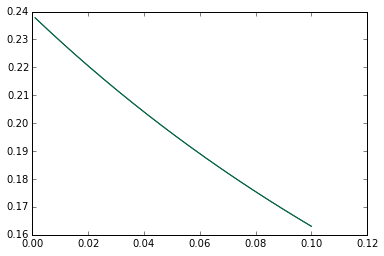

In [58]:
plt.plot(R, density)
plt.plot(R, densityAnalytic)

### NFW potential

Consider $\rho (r) = \frac{1}{4\pi} \frac{1}{r (1 + r)^2}$

In [59]:
a_NFW= 1.
a_SCF= [1., 4, 10., 30.]

def rho_NFW(R, z=0, phi=0.):
    return nfw.dens(R,0)

In [60]:
nfw = NFWPotential(amp=1.,a=a_NFW)
nfwDensity = rho_NFW(R,0)

In [61]:
def plotDensityVaryinga(dens, N, aparem):
    density = nu.zeros((len(aparem), len(R)), float)
    plt.title("NFW Density with N={}".format(N))
    for i in range(len(aparem)):
        a = aparem[i]
        Acos, Asin = compute_coeffs_spherical(dens,N,a=a)
        scf = SCFPotential(1., Acos, Asin,a=a)
        density[i] = calculateSCFDensity(scf,R)
        
        plt.plot(R, density[i], label="a={0}".format(a))
    plt.plot(R, dens(R), label="NFW Density")
    plt.legend()
    plt.ylim(-20,100)
    return density


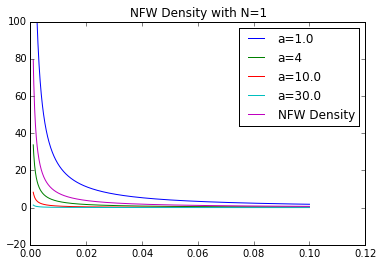

In [62]:
density = plotDensityVaryinga(rho_NFW, 1, a_SCF)

As we can see, the function does not match well enough for N=1.

Let's try increasing the size of the coefficients 

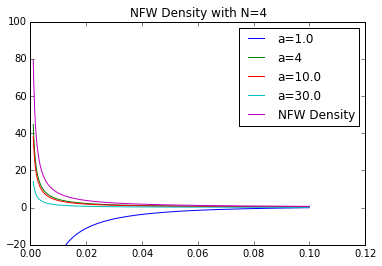

In [63]:
density = plotDensityVaryinga(rho_NFW, 4, a_SCF)

a = 1 is now the worst match. Other than that, the other paremater choices got better. If I were to judge, it looks like a=4 is the best choice for N=4. Let's ommit a=1 from now on.

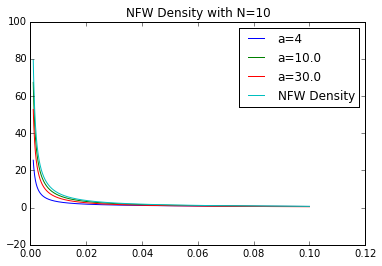

In [64]:
density = plotDensityVaryinga(rho_NFW, 10, a_SCF[1:])

a=4 is now the worse choice. It looks like a=10 is the best choice for N=10

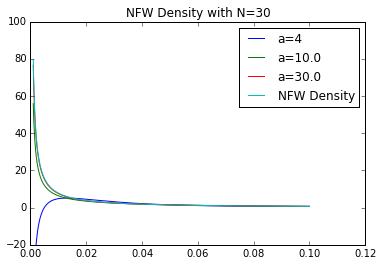

In [65]:
density = plotDensityVaryinga(rho_NFW, 30, a_SCF[1:])

a=4 is now doing terrible. It looks like a=30. is the best choice for N=30.

### Axisymmetric density

We'll check if compute_coeffs_axi reduces to compute_coeffs_spherical for a spherical function, as we expect it to.

First, some useful functions that is unique to spherical densities

In [97]:
epi = 1e-14

##Testing the coeffecients
def test_Acosn(As, Aa):
    return nu.all(nu.fabs(As[0] - Aa[0][:,:1,:1]) < epi)
def test_Acos_nbiggerthan0(Aa):
    return nu.all(nu.fabs(Aa[0][:,1:,1:]) <epi)
def test_Asin_allZero(As, Aa):
    return nu.all(nu.fabs(As[1]) < epi) and nu.all(nu.fabs(Aa[1]) < epi)

def test_all(As,Aa):
    return test_Acosn(As,Aa) and test_Acos_nbiggerthan0(Aa) and test_Asin_allZero(As,Aa)



rho_Spherical

In [102]:
Aspherical = compute_coeffs_spherical(rho_Spherical,5)
Aaxi = compute_coeffs_axi(rho_Spherical, 5, 5)
print test_all(Aspherical,Aaxi)
print Aspherical[0]
print Aaxi[0]

True
[[[  1.00000000e+00]]

 [[ -5.02087446e-18]]

 [[  4.23872908e-18]]

 [[ -4.27582349e-18]]

 [[ -2.86416979e-18]]]
[[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [ -5.39491093e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [  7.37902433e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [ -2.77662415e-15   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [  3.12425595e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]]

 [[ -5.17054971e-18   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [ -1.18395154e-33   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [  2.38597741e-18   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [ -2.65446170e-32   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00]
  [  6.71225863e-17   0.00000000e+00   0.00000000e

Zeeuw's perfect ellipsoid

In [68]:
Aspherical = compute_coeffs_spherical(rho_Zeeuw,10)
Aaxi = compute_coeffs_axi(rho_Zeeuw, 10, 10)
print test_all(Aspherical,Aaxi)

True


###Testing with an axi symmetric density

In [69]:
eps = 0
def axi_density1(R, z=0, phi=0.):
    spherical_coords = cyl_to_spher(R,z, phi)
    theta = spherical_coords[1]
    h = HernquistPotential(2)
    return h.dens(R, z, phi)*(1 + eps*nu.cos(theta)**2)

In [92]:
A = compute_coeffs_axi(axi_density1, 5,5)
A2 = compute_coeffs_spherical(axi_density1, 5)
print test_all(A2, A)
scf = SCFPotential(1., A[0], A[1])

True


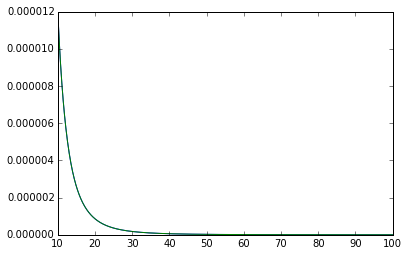

In [85]:
R = nu.linspace(10.,100,1000)
plt.plot(R, calculateSCFDensity(scf, R,0., 0))
plt.plot(R, axi_density1(R, 0., 0))

Unfortunatly, compute_coeffs_axi took a longer time for Flattened Power Potential

8.31367023848


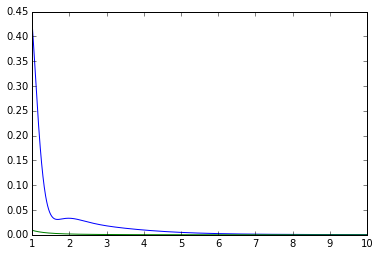

In [113]:
R = nu.ones((1000), float)*0
Z = nu.linspace(1.,10, 1000)
plt.plot(Z, calculateSCFDensity(scf, R, Z))
plt.plot(Z, fp.dens(R,Z))
print nu.std(calculateSCFDensity(scf,R, Z)/fp.dens(R,Z))

It looks like there might be an issue with my code :(